<a href="https://colab.research.google.com/github/potatosoupx/python/blob/main/ptb-colab/plot_group.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import scipy.signal as signal
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline

# VCG Reference Data

In [5]:
result=pd.read_csv('result.csv')

#3D VCG

In [6]:
import plotly.graph_objects as go
import numpy as np

# Helix equation
t = np.linspace(0, 20, 100)
fig = go.Figure(data=[go.Scatter3d(
    x=result['vx_sum'],
    y=result['vy_sum'],
    z=result['vz_sum'],
    mode='markers',
    marker=dict(
        size=5,
        opacity=0.8
    )
)])

# tight layout
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig.show()

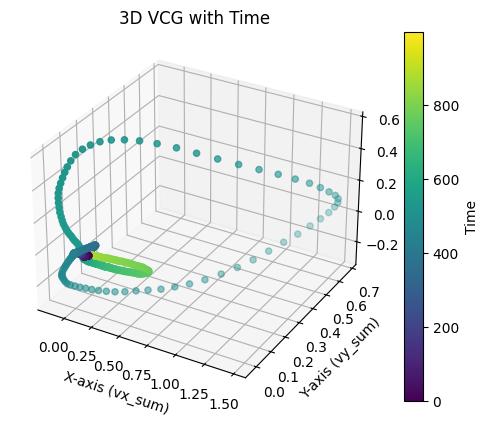

In [8]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x = result['vx_sum']
y = result['vy_sum']
z = result['vz_sum']
time = np.arange(len(x))
points = ax.scatter(x, y, z, c=time, cmap='viridis', marker='o')
fig.colorbar(points, ax=ax, label='Time')

ax.set_xlabel('X-axis (vx_sum)')
ax.set_ylabel('Y-axis (vy_sum)')
ax.set_zlabel('Z-axis (vz_sum)')

plt.title('3D VCG with Time')
plt.show()

# 3 loop

In [9]:
p_vx=result['vx_sum'].iloc[280:440]
p_vy=result['vy_sum'].iloc[280:440]
p_vz=result['vz_sum'].iloc[280:440]

p_wave = pd.DataFrame({'vx': p_vx, 'vy': p_vy, 'vz': p_vz})

qrs_vx=result['vx_sum'].iloc[440:600]
qrs_vy=result['vy_sum'].iloc[440:600]
qrs_vz=result['vz_sum'].iloc[440:600]

qrs_wave = pd.DataFrame({'vx': qrs_vx, 'vy': qrs_vy, 'vz': qrs_vz})

t_vx=result['vx_sum'].iloc[600:940]
t_vy=result['vy_sum'].iloc[600:940]
t_vz=result['vz_sum'].iloc[600:940]

t_wave = pd.DataFrame({'vx': t_vx, 'vy': t_vy, 'vz': t_vz})

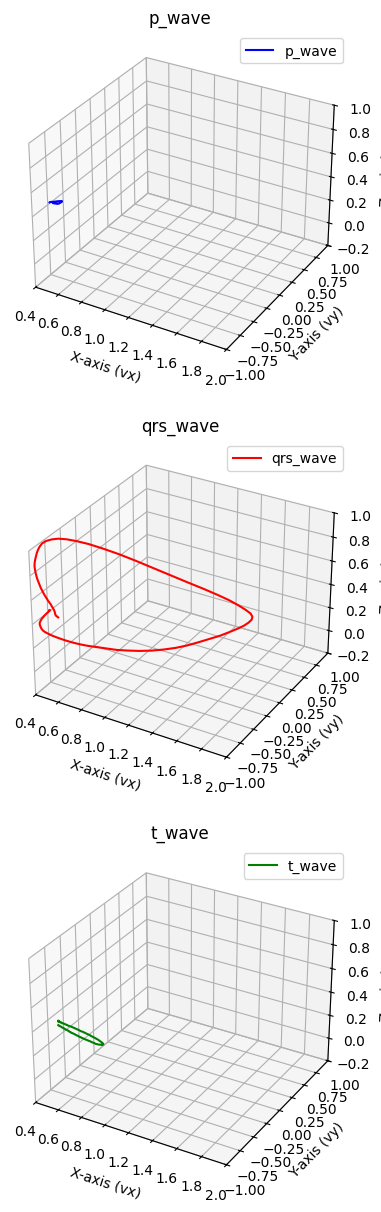

In [10]:
# 3D 그래프 설정
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(311, projection='3d')
bx = fig.add_subplot(312, projection='3d')
cx = fig.add_subplot(313, projection='3d')
# 3D 그래프 그리기
ax.plot(p_wave['vx'], p_wave['vy'], p_wave['vz'], color='b', label='p_wave')
bx.plot(qrs_wave['vx'], qrs_wave['vy'], qrs_wave['vz'], color='r', label='qrs_wave')
cx.plot(t_wave['vx'], t_wave['vy'], t_wave['vz'], color='g', label='t_wave')


# 축 레이블 설정
ax.set_xlabel('X-axis (vx)')
ax.set_ylabel('Y-axis (vy)')
ax.set_zlabel('Z-axis (vz)')

bx.set_xlabel('X-axis (vx)')
bx.set_ylabel('Y-axis (vy)')
bx.set_zlabel('Z-axis (vz)')

cx.set_xlabel('X-axis (vx)')
cx.set_ylabel('Y-axis (vy)')
cx.set_zlabel('Z-axis (vz)')

# 사용자 정의 축 범위 설정
x_min, x_max = 0.4, 2  # 사용자 정의 x축 범위
y_min, y_max = -1, 1  # 사용자 정의 y축 범위
z_min, z_max = -0.2, 1  # 사용자 정의 z축 범위

ax.set_xlim(x_min, x_max)
ax.set_ylim(y_min, y_max)
ax.set_zlim(z_min, z_max)

bx.set_xlim(x_min, x_max)
bx.set_ylim(y_min, y_max)
bx.set_zlim(z_min, z_max)

cx.set_xlim(x_min, x_max)
cx.set_ylim(y_min, y_max)
cx.set_zlim(z_min, z_max)

# 그래프 제목과 범례 설정
ax.set_title('p_wave')
ax.legend()

bx.set_title('qrs_wave')
bx.legend()

cx.set_title('t_wave')
cx.legend()

# 그리드 설정
ax.grid()
bx.grid()
cx.grid()
# 그래프 표시
plt.show()